In [1]:
import pandas as pd
import numpy as np

#Read files:
twm_accounts = pd.read_csv("C:/Users/patel/lighthouse-lab-allprojects/twm_accounts.csv")

In [2]:
twm_accounts.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,1995-12-10,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,1993-03-15,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,1992-03-18,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,1995-07-06,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,1994-06-17,NaN,849.37,462.28


In [3]:
twm_accounts['acct_type'].unique()

array(['SV  ', 'CC  ', 'CK  '], dtype=object)

In [4]:
twm_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [5]:
twm_accounts = twm_accounts.drop(['acct_start_date','acct_end_date'], axis=1)

In [6]:
twm_customer = pd.read_csv("C:/Users/patel/lighthouse-lab-allprojects/twm_customer.csv")
twm_customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [7]:
twm_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [8]:
twm_customer1 = twm_customer.drop(['first_name','last_name','street_nbr','street_name','postal_code','city_name','state_code','name_prefix','cust_id'], axis=1)

In [9]:
twm_customer1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   income           747 non-null    int64 
 1   age              747 non-null    int64 
 2   years_with_bank  747 non-null    int64 
 3   nbr_children     747 non-null    int64 
 4   gender           747 non-null    object
 5   marital_status   747 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 35.1+ KB


In [10]:
categories = twm_customer1.dtypes[twm_customer.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(twm_customer1[categories])
df = pd.concat([twm_customer1, df_dummy], axis=1)
df_final = df.drop(columns=categories)

In [11]:
import pandas as pd
from sklearn import preprocessing

In [12]:
standard_scaler = preprocessing.StandardScaler()
df_normalized = pd.DataFrame(standard_scaler.fit_transform(df_final), columns=df_final.columns)

In [13]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   income           747 non-null    float64
 1   age              747 non-null    float64
 2   years_with_bank  747 non-null    float64
 3   nbr_children     747 non-null    float64
 4   marital_status   747 non-null    float64
 5   gender_F         747 non-null    float64
 6   gender_M         747 non-null    float64
dtypes: float64(7)
memory usage: 41.0 KB


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.cluster import KMeans   #<---- We will use sci-kit learns implementation of K-means
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [15]:
X1 = df_normalized['income']
X2 = df_normalized['age']
X = np.column_stack((X1, X2))

In [16]:
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)

In [17]:
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    label=kmeanModel.predict(X)
    silhouettes.append(silhouette_score(X,label))

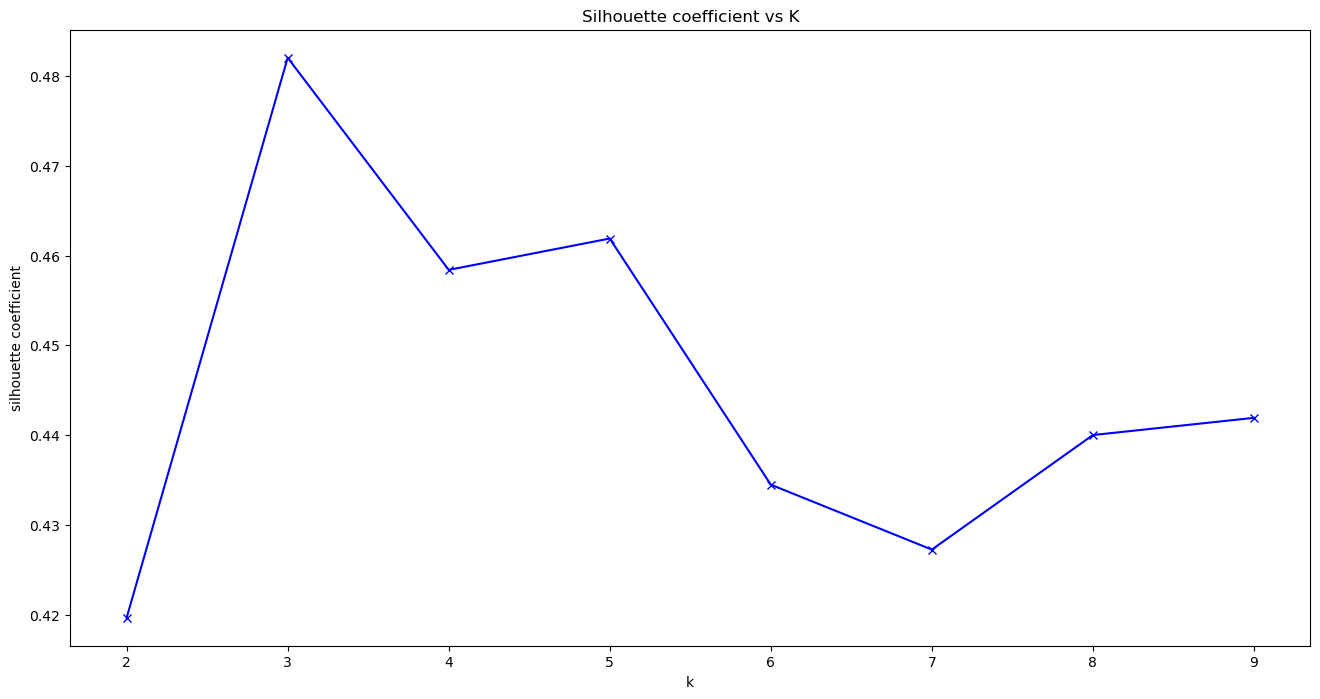

In [18]:
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [19]:
model = KMeans(3) #instatiating
model.fit(X)
y_pred = model.predict(X)


In [20]:
print(model.cluster_centers_) 

[[ 1.62146667  0.17076718]
 [-0.54860662 -0.90047591]
 [-0.18944177  0.9748589 ]]


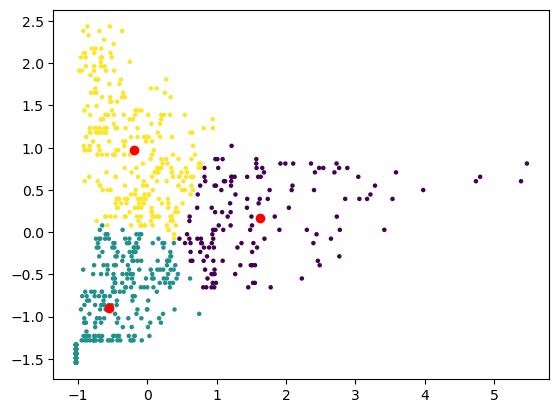

In [21]:
plt.scatter(X[:,0], X[:,1], c=y_pred, s=5) #have color (c) represent the predictions (y_pred)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red')

In [22]:
labels = model.labels_
df_normalized['Cluster'] = labels

In [23]:
cluster_groups = df_normalized.groupby('Cluster').agg('mean')
cluster_groups

,income,age,years_with_bank,nbr_children,marital_status,gender_F,gender_M
Cluster,,,,,,,
0,1.621467,0.170767,0.018854,0.594710,0.328261,-0.239732,0.239732
1,-0.548607,-0.900476,-0.145017,-0.024292,-0.286368,0.037084,-0.037084
2,-0.189442,0.974859,0.161460,-0.278340,0.168596,0.079982,-0.079982


In [24]:
categories = cluster_groups.columns.tolist()
cluster_groups.iloc[0].tolist()

[1.6214666738303332,
 0.17076718333883875,
 0.018853555590503248,
 0.5947103507989662,
 0.3282612746030351,
 -0.2397319509241592,
 0.23973195092415941]

In [25]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=cluster_groups.iloc[0].tolist(),
      theta=categories,
      name='Cluster 0'
))

fig.add_trace(go.Scatterpolar(
      r=cluster_groups.iloc[1].tolist(),
      theta=categories,
      
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=cluster_groups.iloc[2].tolist(),
      theta=categories,
      
      name='Cluster 2'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1,2]
    )),
  showlegend=False
)

fig.show()

In [26]:
new_df = df_normalized.drop(['Cluster'], axis=1)

In [27]:
new_df['income'].min()

-1.0241492638851

In [28]:
def classify_income(income):
    if income < 0:
        return 'less'
    elif income >= 0 and income < 1.5:
        return 'medium'
    elif income >= 1.5 and income < 3:
        return 'high'
    else:
        return 'great'

In [29]:
new_df['classify_income'] = new_df['income'].apply(classify_income)
new_df=new_df.drop('income',axis=1)

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              747 non-null    float64
 1   years_with_bank  747 non-null    float64
 2   nbr_children     747 non-null    float64
 3   marital_status   747 non-null    float64
 4   gender_F         747 non-null    float64
 5   gender_M         747 non-null    float64
 6   classify_income  747 non-null    object 
dtypes: float64(6), object(1)
memory usage: 41.0+ KB


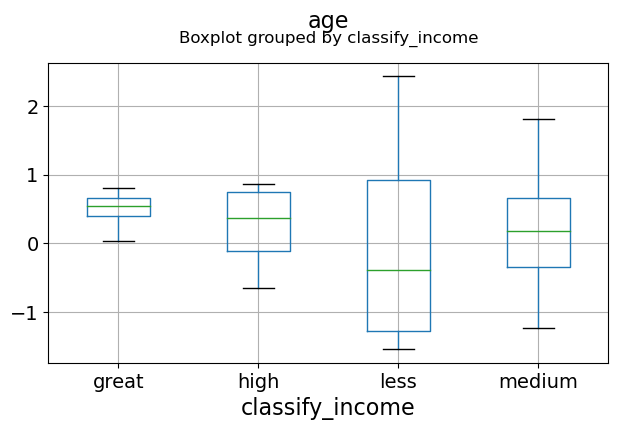

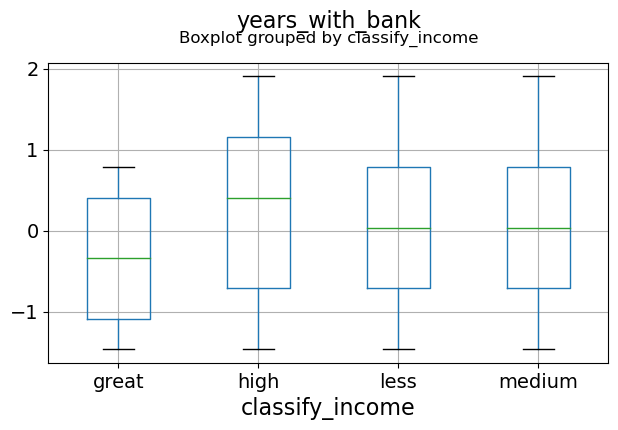

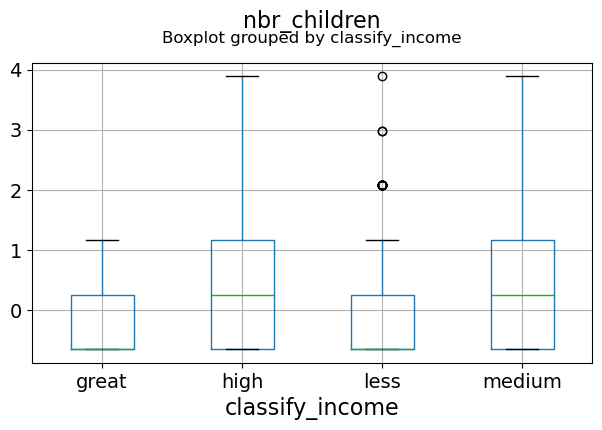

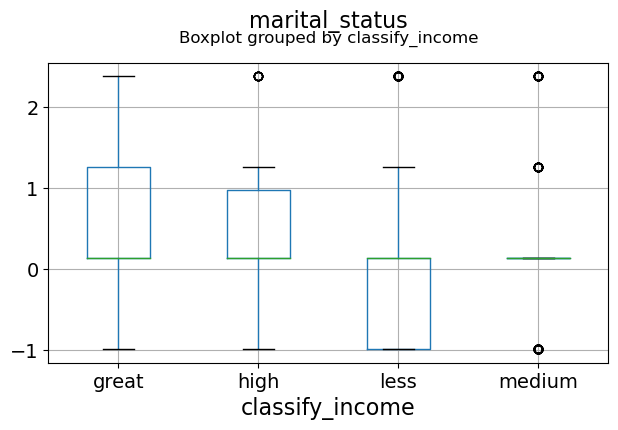

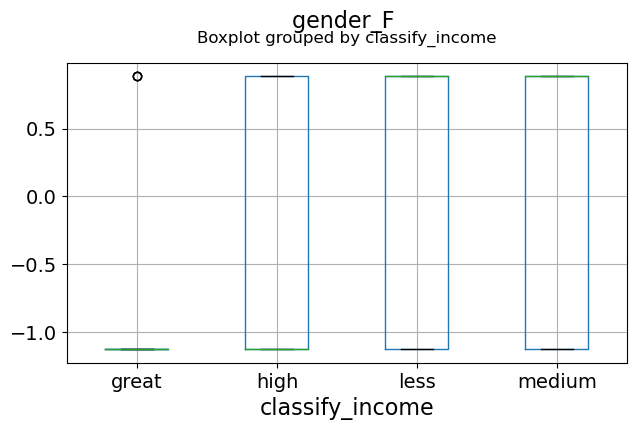

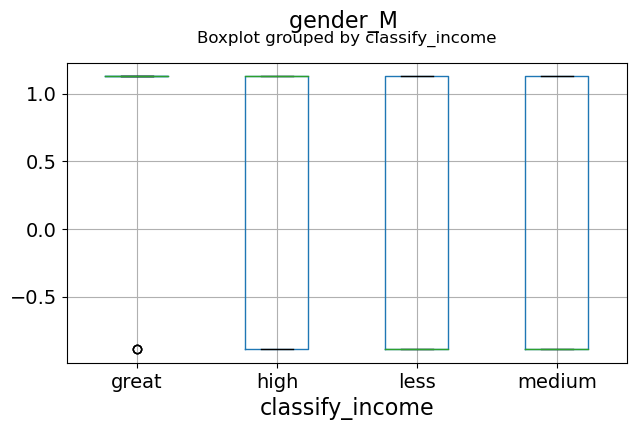

In [31]:
for c in new_df.columns[:-1]:
    new_df.boxplot(c,by='classify_income',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel('classify_income', fontsize=16)

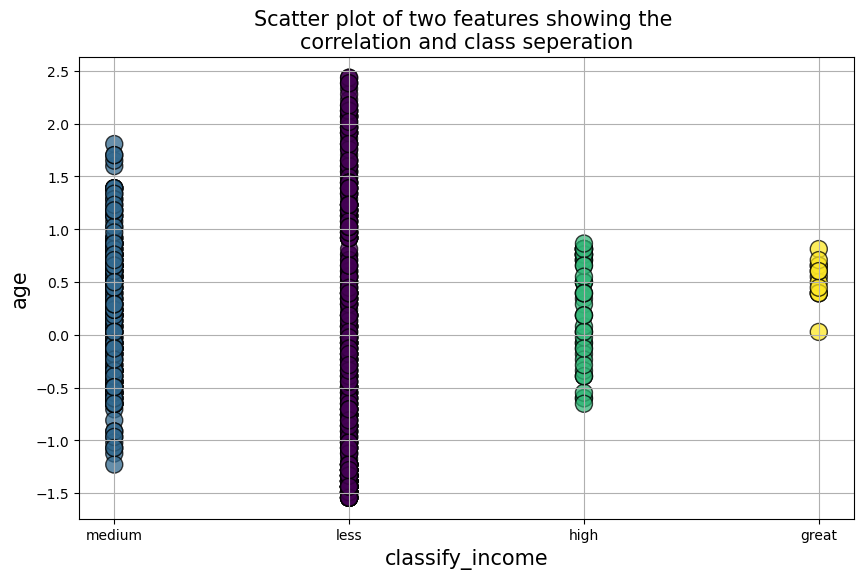

In [32]:
scale_mapper = {"less":1, "medium":2, "high":3,"great":4}
new_df["Scale"] = new_df['classify_income'].replace(scale_mapper)


plt.figure(figsize=(10,6))
plt.scatter(new_df['classify_income'],new_df['age'],c=new_df['Scale'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel('classify_income',fontsize=15)
plt.ylabel("age",fontsize=15)
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = new_df.drop(['classify_income','Scale'],axis=1)
y = new_df['Scale']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=new_df.columns[:-2])
dfx.head(10)

,age,years_with_bank,nbr_children,marital_status,gender_F,gender_M
0,0.184312,0.408539,0.258591,0.132149,-1.127172,1.127172
1,1.493070,-1.087435,-0.648298,0.132149,-1.127172,1.127172
2,-0.234490,1.530520,-0.648298,-0.989614,0.887176,-0.887176
3,0.603115,-0.339448,-0.648298,-0.989614,0.887176,-0.887176
4,0.864867,1.904514,1.165479,2.375675,0.887176,-0.887176
5,0.550765,-0.339448,1.165479,0.132149,0.887176,-0.887176
6,-1.386197,-1.087435,-0.648298,-0.989614,-1.127172,1.127172
7,1.911873,1.530520,-0.648298,0.132149,0.887176,-0.887176
8,-0.077439,-1.087435,3.886146,2.375675,0.887176,-0.887176
9,0.184312,0.782533,0.258591,0.132149,-1.127172,1.127172


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(dfx)


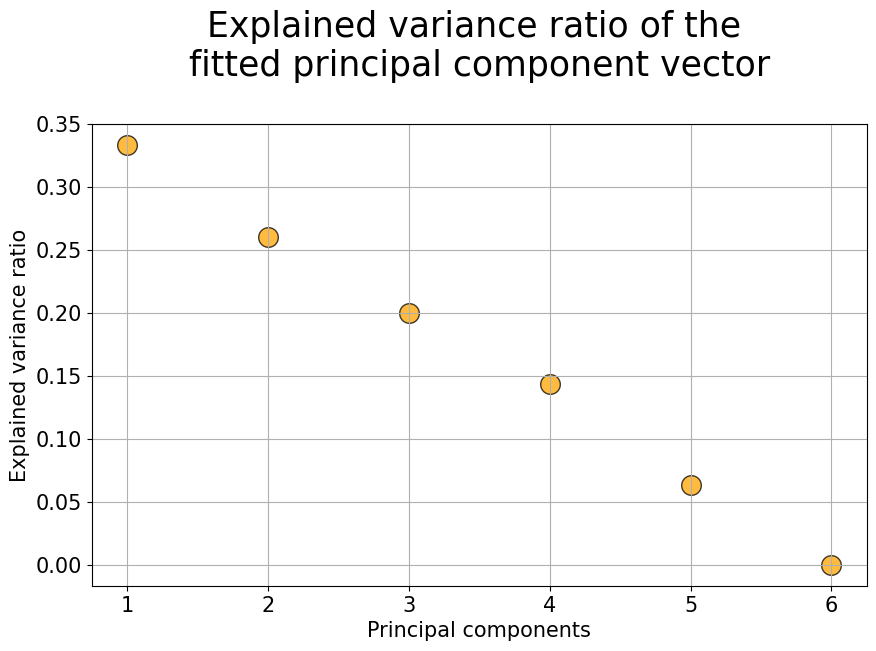

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

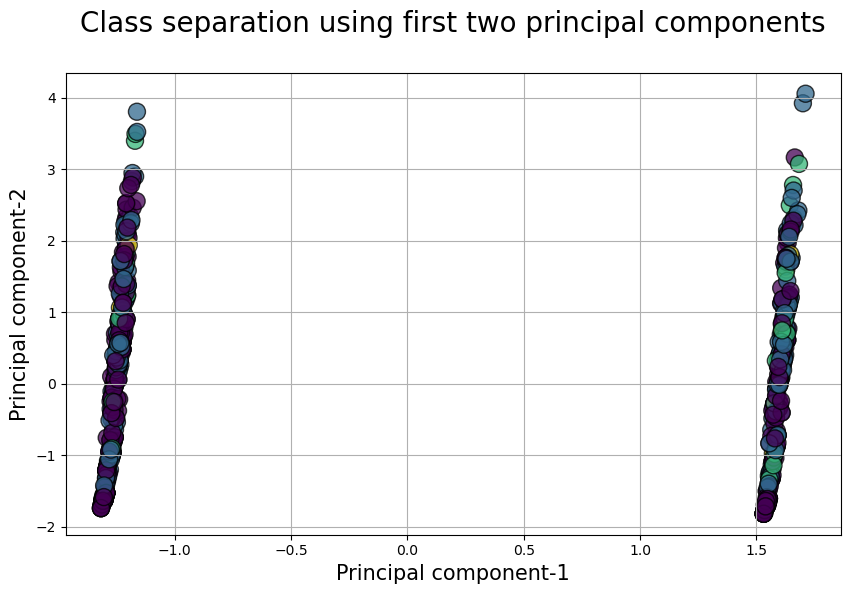

In [36]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=new_df['Scale'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [43]:
twm_transactions = pd.read_csv("C:/Users/patel/lighthouse-lab-allprojects/twm_transactions.csv")
twm_transactions.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,1995-10-21,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,1995-02-05,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,1995-07-23,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,1995-01-30,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,1995-01-25,204521,B,IQ


In [44]:
twm_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_id        77580 non-null  int64  
 1   acct_nbr       77580 non-null  int64  
 2   tran_amt       77580 non-null  float64
 3   principal_amt  77580 non-null  float64
 4   interest_amt   77580 non-null  float64
 5   new_balance    77580 non-null  float64
 6   tran_date      77580 non-null  object 
 7   tran_time      77580 non-null  int64  
 8   channel        77580 non-null  object 
 9   tran_code      77580 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.9+ MB


In [45]:
merged_table = pd.merge(twm_transactions, twm_accounts, on='acct_nbr', how='outer')

In [46]:
merged_table1 = pd.merge(merged_table, twm_customer, on='cust_id', how='outer')

In [47]:
merged_table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77674 entries, 0 to 77673
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tran_id           77580 non-null  float64
 1   acct_nbr          77592 non-null  float64
 2   tran_amt          77580 non-null  float64
 3   principal_amt     77580 non-null  float64
 4   interest_amt      77580 non-null  float64
 5   new_balance       77580 non-null  float64
 6   tran_date         77580 non-null  object 
 7   tran_time         77580 non-null  float64
 8   channel           77580 non-null  object 
 9   tran_code         77580 non-null  object 
 10  cust_id           77654 non-null  float64
 11  acct_type         77572 non-null  object 
 12  account_active    77572 non-null  object 
 13  starting_balance  77572 non-null  float64
 14  ending_balance    77572 non-null  float64
 15  income            77654 non-null  float64
 16  age               77654 non-null  float6

In [48]:
column = ['acct_nbr',
          'tran_id',
 'tran_date',
 'tran_time',
 'channel',
 'tran_code',
 'cust_id',
 'name_prefix',
 'first_name',
 'last_name',
 'street_nbr',
 'street_name',
 'postal_code',
 'city_name',
 'state_code']

In [49]:
merged_table1 = merged_table1.drop(column , axis=1)

In [50]:
merged_table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77674 entries, 0 to 77673
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tran_amt          77580 non-null  float64
 1   principal_amt     77580 non-null  float64
 2   interest_amt      77580 non-null  float64
 3   new_balance       77580 non-null  float64
 4   acct_type         77572 non-null  object 
 5   account_active    77572 non-null  object 
 6   starting_balance  77572 non-null  float64
 7   ending_balance    77572 non-null  float64
 8   income            77654 non-null  float64
 9   age               77654 non-null  float64
 10  years_with_bank   77654 non-null  float64
 11  nbr_children      77654 non-null  float64
 12  gender            77654 non-null  object 
 13  marital_status    77654 non-null  float64
dtypes: float64(11), object(3)
memory usage: 8.9+ MB


In [51]:
merged_table1.columns.tolist()

['tran_amt',
 'principal_amt',
 'interest_amt',
 'new_balance',
 'acct_type',
 'account_active',
 'starting_balance',
 'ending_balance',
 'income',
 'age',
 'years_with_bank',
 'nbr_children',
 'gender',
 'marital_status']

In [52]:
df = merged_table1.dropna(subset=['acct_type'], axis=0)

In [53]:
df = df.fillna(0)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77572 entries, 0 to 77591
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tran_amt          77572 non-null  float64
 1   principal_amt     77572 non-null  float64
 2   interest_amt      77572 non-null  float64
 3   new_balance       77572 non-null  float64
 4   acct_type         77572 non-null  object 
 5   account_active    77572 non-null  object 
 6   starting_balance  77572 non-null  float64
 7   ending_balance    77572 non-null  float64
 8   income            77572 non-null  float64
 9   age               77572 non-null  float64
 10  years_with_bank   77572 non-null  float64
 11  nbr_children      77572 non-null  float64
 12  gender            77572 non-null  object 
 13  marital_status    77572 non-null  float64
dtypes: float64(11), object(3)
memory usage: 8.9+ MB


In [55]:
df = df[df['acct_type'] == 'SV  ']

In [56]:
categories = df.dtypes[df.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df[categories])
df = pd.concat([df, df_dummy], axis=1)
df_final = df.drop(columns=categories)

In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11190 entries, 0 to 77591
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tran_amt           11190 non-null  float64
 1   principal_amt      11190 non-null  float64
 2   interest_amt       11190 non-null  float64
 3   new_balance        11190 non-null  float64
 4   starting_balance   11190 non-null  float64
 5   ending_balance     11190 non-null  float64
 6   income             11190 non-null  float64
 7   age                11190 non-null  float64
 8   years_with_bank    11190 non-null  float64
 9   nbr_children       11190 non-null  float64
 10  marital_status     11190 non-null  float64
 11  acct_type_SV       11190 non-null  uint8  
 12  account_active_N   11190 non-null  uint8  
 13  account_active_Y   11190 non-null  uint8  
 14  gender_F           11190 non-null  uint8  
 15  gender_M           11190 non-null  uint8  
dtypes: float64(11), uint8(

In [58]:
standard_scaler = preprocessing.StandardScaler()
df_normalized = pd.DataFrame(standard_scaler.fit_transform(df_final), columns=df_final.columns)

In [59]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11190 entries, 0 to 11189
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tran_amt           11190 non-null  float64
 1   principal_amt      11190 non-null  float64
 2   interest_amt       11190 non-null  float64
 3   new_balance        11190 non-null  float64
 4   starting_balance   11190 non-null  float64
 5   ending_balance     11190 non-null  float64
 6   income             11190 non-null  float64
 7   age                11190 non-null  float64
 8   years_with_bank    11190 non-null  float64
 9   nbr_children       11190 non-null  float64
 10  marital_status     11190 non-null  float64
 11  acct_type_SV       11190 non-null  float64
 12  account_active_N   11190 non-null  float64
 13  account_active_Y   11190 non-null  float64
 14  gender_F           11190 non-null  float64
 15  gender_M           11190 non-null  float64
dtypes: float64(16)
memory 

In [60]:
X1 = df_normalized['income']
X2 = df_normalized['tran_amt']
X = np.column_stack((X1, X2))

In [61]:
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)

In [62]:

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    label=kmeanModel.predict(X)
    silhouettes.append(silhouette_score(X,label))

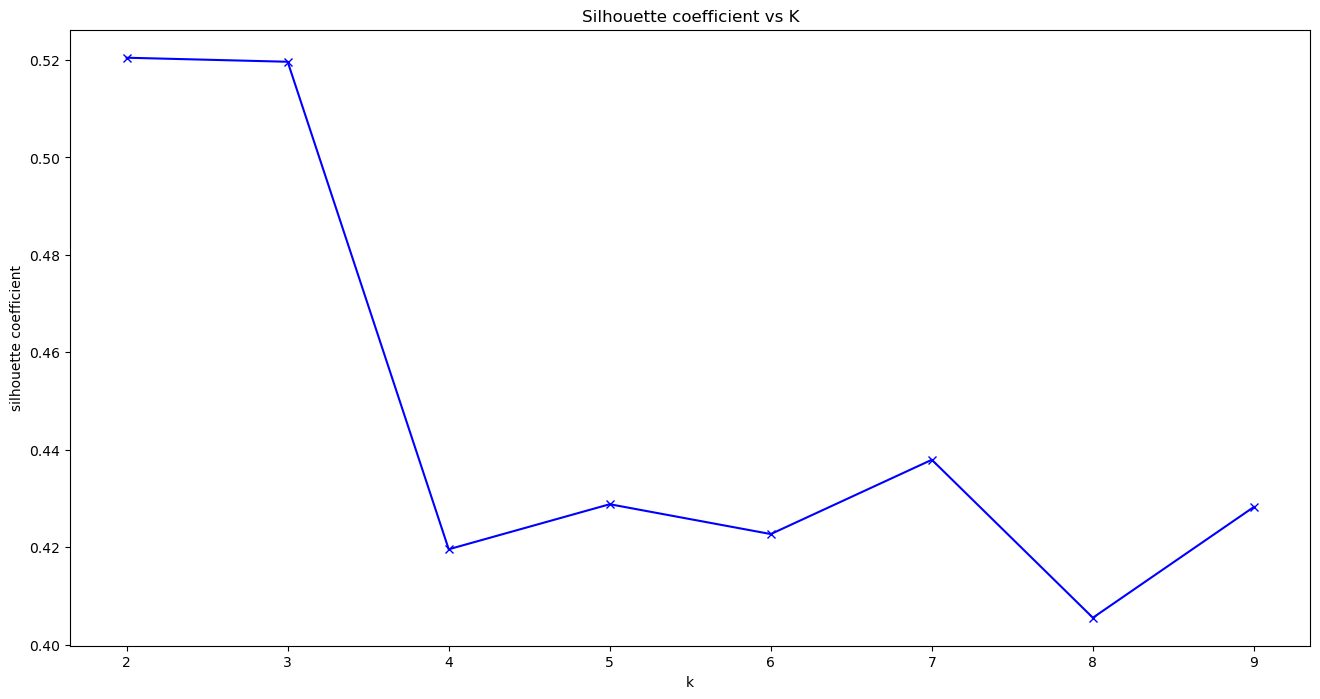

In [63]:
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [64]:
model = KMeans(3) #instatiating
model.fit(X)
y_pred = model.predict(X)

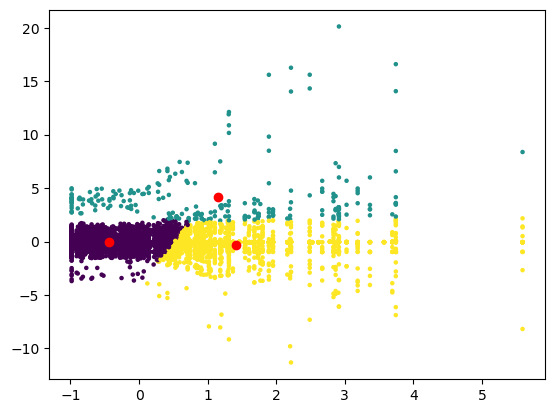

In [65]:
plt.scatter(X[:,0], X[:,1], c=y_pred, s=5) #have color (c) represent the predictions (y_pred)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red')

In [66]:
labels = model.labels_
df_normalized['Cluster'] = labels

In [67]:
cluster_groups = df_normalized.groupby('Cluster').agg('mean')
cluster_groups

,tran_amt,principal_amt,interest_amt,new_balance,starting_balance,ending_balance,income,age,years_with_bank,nbr_children,marital_status,acct_type_SV,account_active_N,account_active_Y,gender_F,gender_M
Cluster,,,,,,,,,,,,,,,,
0,-0.040915,-0.039914,-0.077300,-0.164399,-0.150448,-0.185881,-0.437049,-0.087490,-0.043371,-0.137229,-0.132186,0.0,0.003746,-0.003746,0.063315,-0.063315
1,4.194224,4.197346,-0.290484,1.020044,0.470669,1.009887,1.135363,0.248226,0.210368,0.326322,0.324584,0.0,0.090208,-0.090208,-0.076095,0.076095
2,-0.276019,-0.279838,0.299981,0.474205,0.480244,0.550514,1.418293,0.281826,0.130975,0.448347,0.430845,0.0,-0.022150,0.022150,-0.214306,0.214306


In [68]:
categories = cluster_groups.columns.tolist()

In [70]:
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=cluster_groups.iloc[0].tolist(),
      theta=categories,
      name='Cluster 0'
))

fig.add_trace(go.Scatterpolar(
      r=cluster_groups.iloc[1].tolist(),
      theta=categories,
      
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=cluster_groups.iloc[2].tolist(),
      theta=categories,
      
      name='Cluster 2'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1,2]
    )),
  showlegend=False
)

fig.show()

In [71]:
new_df = df_normalized.drop(['Cluster'], axis=1)

In [72]:
def classify_income(income):
    if income < 0:
        return 'less'
    elif income >= 0 and income < 1.5:
        return 'medium'
    elif income >= 1.5 and income < 3:
        return 'high'
    else:
        return 'great'

In [73]:
new_df['classify_income'] = new_df['income'].apply(classify_income)
new_df=new_df.drop('income',axis=1)

In [74]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11190 entries, 0 to 11189
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tran_amt           11190 non-null  float64
 1   principal_amt      11190 non-null  float64
 2   interest_amt       11190 non-null  float64
 3   new_balance        11190 non-null  float64
 4   starting_balance   11190 non-null  float64
 5   ending_balance     11190 non-null  float64
 6   age                11190 non-null  float64
 7   years_with_bank    11190 non-null  float64
 8   nbr_children       11190 non-null  float64
 9   marital_status     11190 non-null  float64
 10  acct_type_SV       11190 non-null  float64
 11  account_active_N   11190 non-null  float64
 12  account_active_Y   11190 non-null  float64
 13  gender_F           11190 non-null  float64
 14  gender_M           11190 non-null  float64
 15  classify_income    11190 non-null  object 
dtypes: float64(15), object

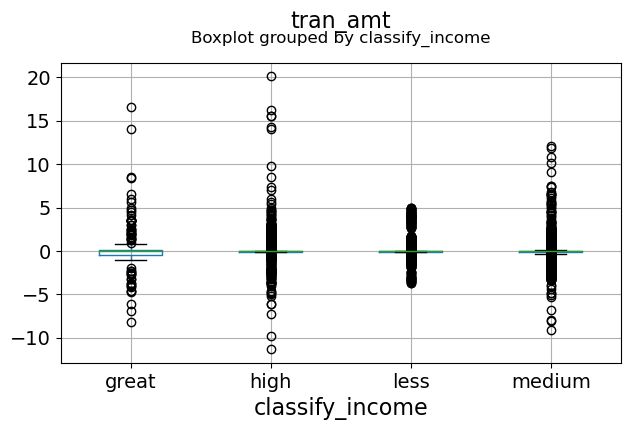

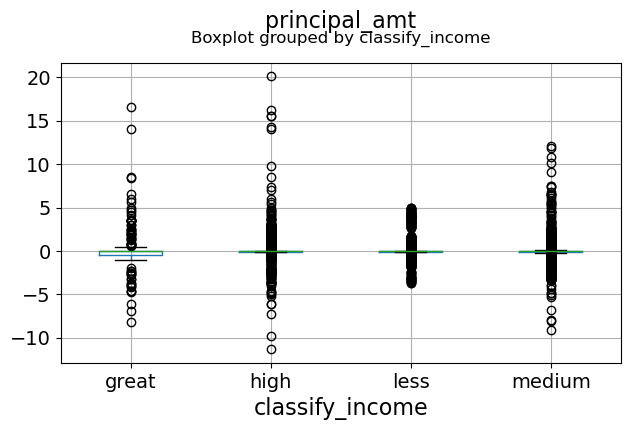

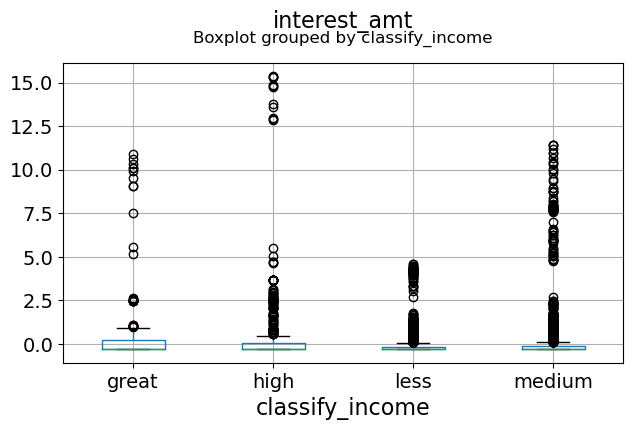

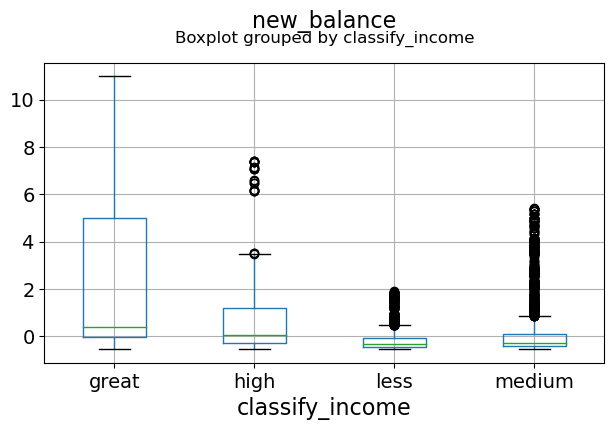

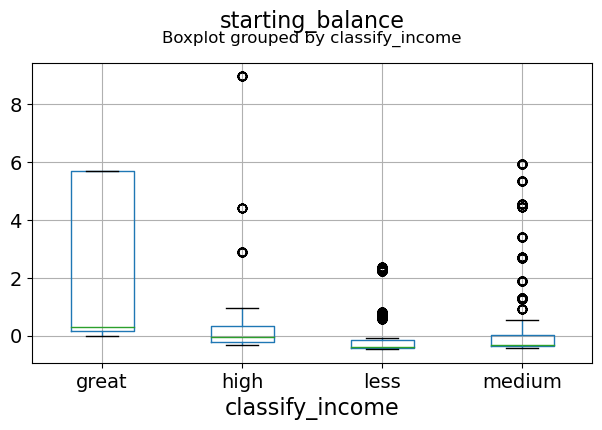

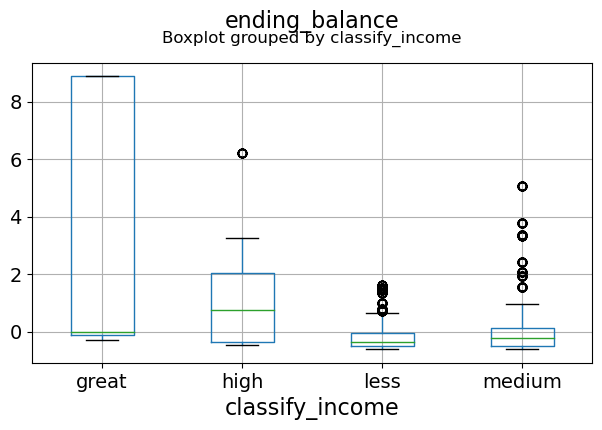

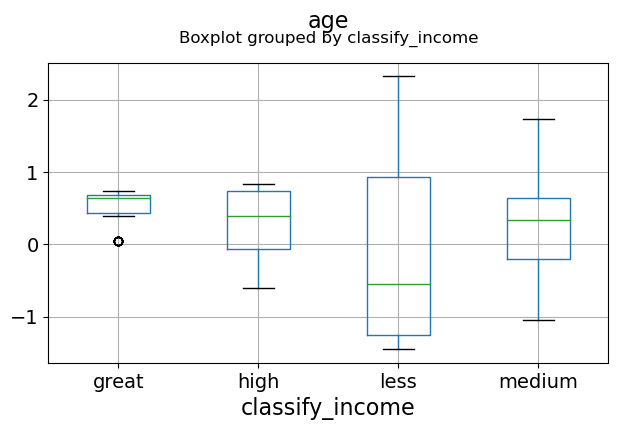

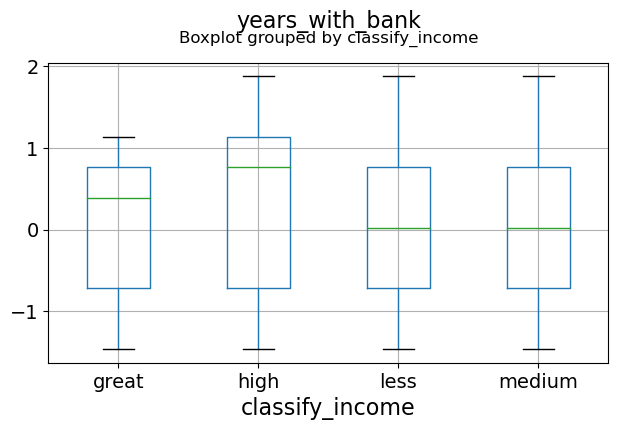

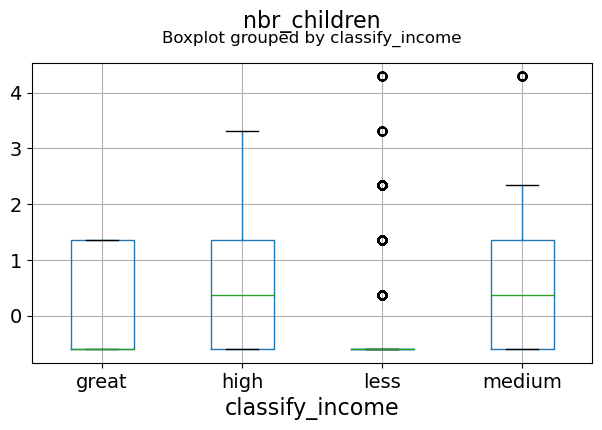

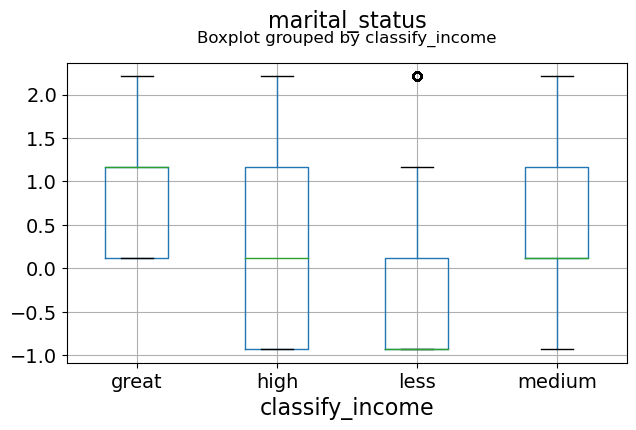

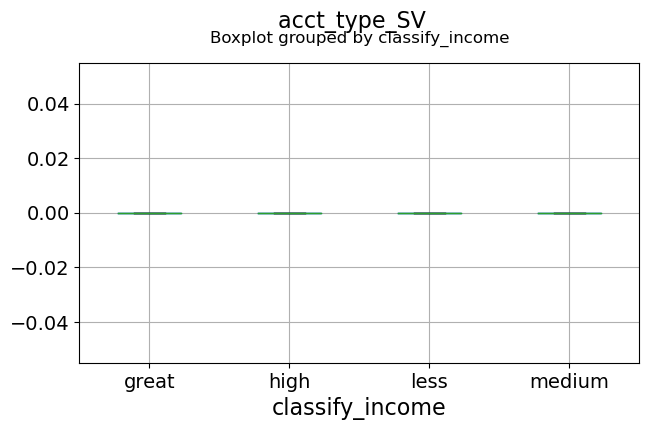

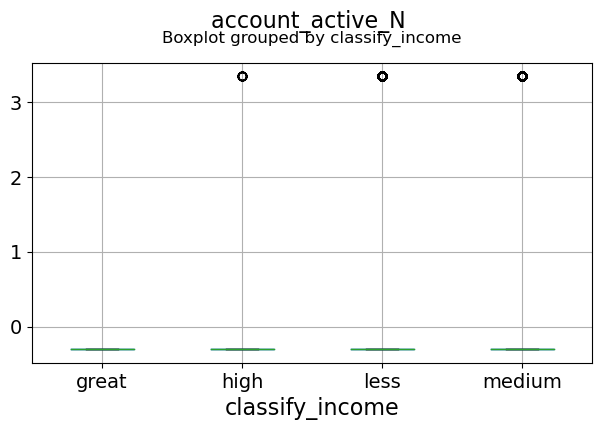

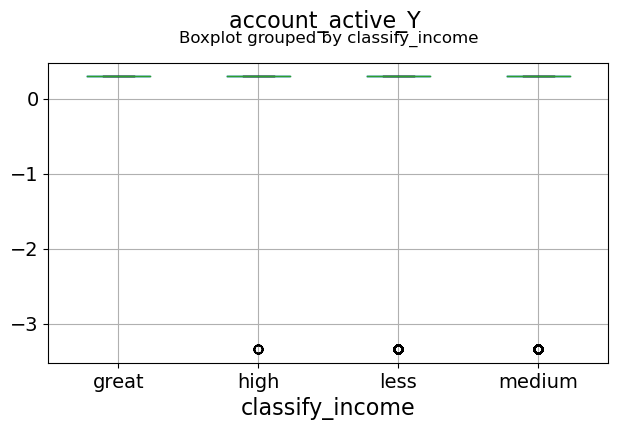

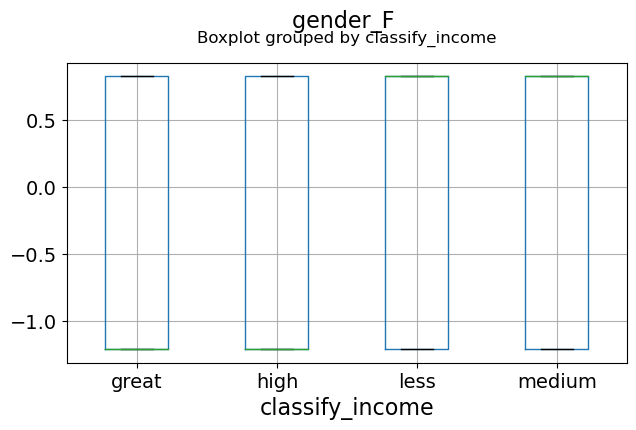

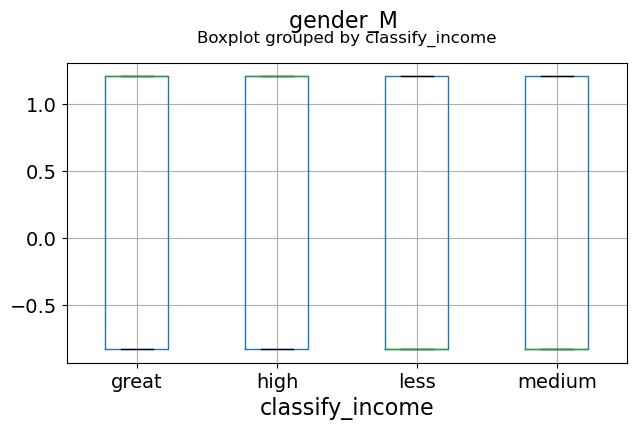

In [75]:
for c in new_df.columns[:-1]:
    new_df.boxplot(c,by='classify_income',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel('classify_income', fontsize=16)

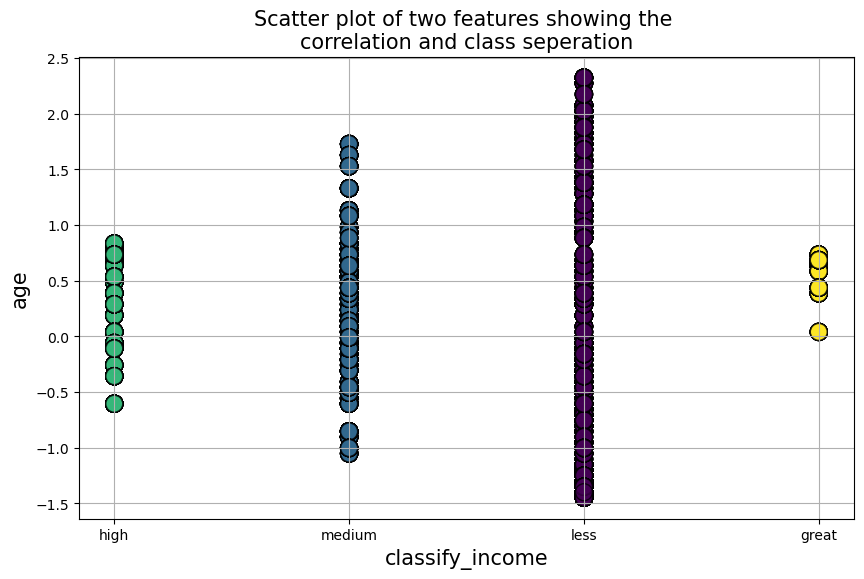

In [76]:
scale_mapper = {"less":1, "medium":2, "high":3,"great":4}
new_df["Scale"] = new_df['classify_income'].replace(scale_mapper)


plt.figure(figsize=(10,6))
plt.scatter(new_df['classify_income'],new_df['age'],c=new_df['Scale'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel('classify_income',fontsize=15)
plt.ylabel("age",fontsize=15)
plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = new_df.drop(['classify_income','Scale'],axis=1)
y = new_df['Scale']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=new_df.columns[:-2])
dfx.head(10)

,tran_amt,principal_amt,interest_amt,new_balance,starting_balance,ending_balance,age,years_with_bank,nbr_children,marital_status,acct_type_SV,account_active_N,account_active_Y,gender_F,gender_M
0,-0.065136,-0.061389,-0.290484,1.118539,-0.301016,1.029687,0.188415,0.762004,-0.599935,-0.927312,0.0,-0.299301,0.299301,0.82856,-0.82856
1,0.568471,0.572125,-0.290484,1.165785,-0.301016,1.029687,0.188415,0.762004,-0.599935,-0.927312,0.0,-0.299301,0.299301,0.82856,-0.82856
2,-0.062929,-0.061389,-0.118925,-0.370671,-0.301016,1.029687,0.188415,0.762004,-0.599935,-0.927312,0.0,-0.299301,0.299301,0.82856,-0.82856
3,-0.605795,-0.601969,-0.290484,0.453943,-0.301016,1.029687,0.188415,0.762004,-0.599935,-0.927312,0.0,-0.299301,0.299301,0.82856,-0.82856
4,-0.695905,-0.692065,-0.290484,1.118539,-0.301016,1.029687,0.188415,0.762004,-0.599935,-0.927312,0.0,-0.299301,0.299301,0.82856,-0.82856
5,-0.065136,-0.061389,-0.290484,1.103463,-0.301016,1.029687,0.188415,0.762004,-0.599935,-0.927312,0.0,-0.299301,0.299301,0.82856,-0.82856
6,-0.062929,-0.061389,-0.118925,-0.370888,-0.301016,1.029687,0.188415,0.762004,-0.599935,-0.927312,0.0,-0.299301,0.299301,0.82856,-0.82856
7,1.969048,1.972497,-0.290484,0.507123,-0.301016,1.029687,0.188415,0.762004,-0.599935,-0.927312,0.0,-0.299301,0.299301,0.82856,-0.82856
8,2.524215,2.527582,-0.290484,1.180582,-0.301016,1.029687,0.188415,0.762004,-0.599935,-0.927312,0.0,-0.299301,0.299301,0.82856,-0.82856
9,-0.390883,-0.387088,-0.290484,1.103463,-0.301016,1.029687,0.188415,0.762004,-0.599935,-0.927312,0.0,-0.299301,0.299301,0.82856,-0.82856


In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(dfx)


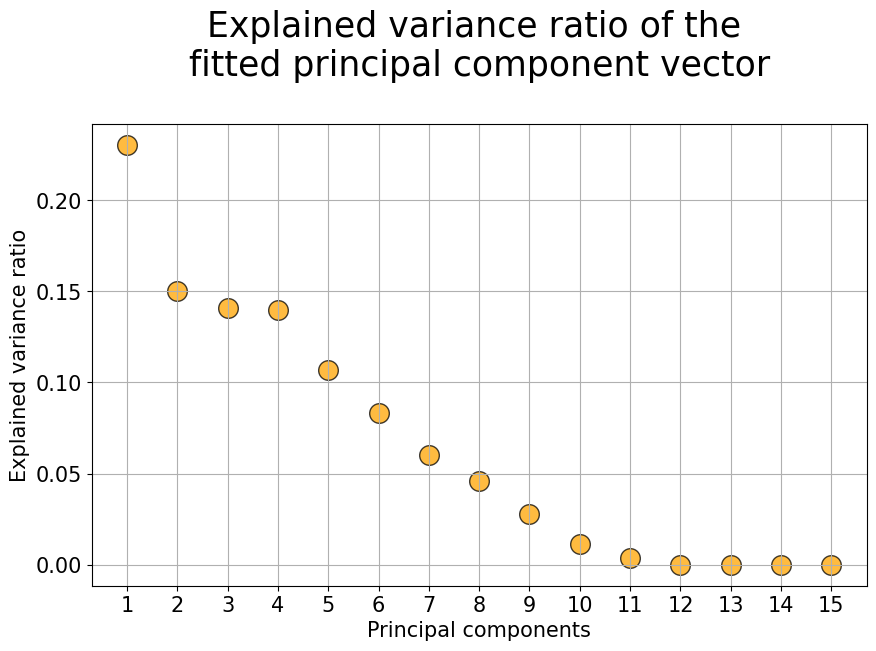

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

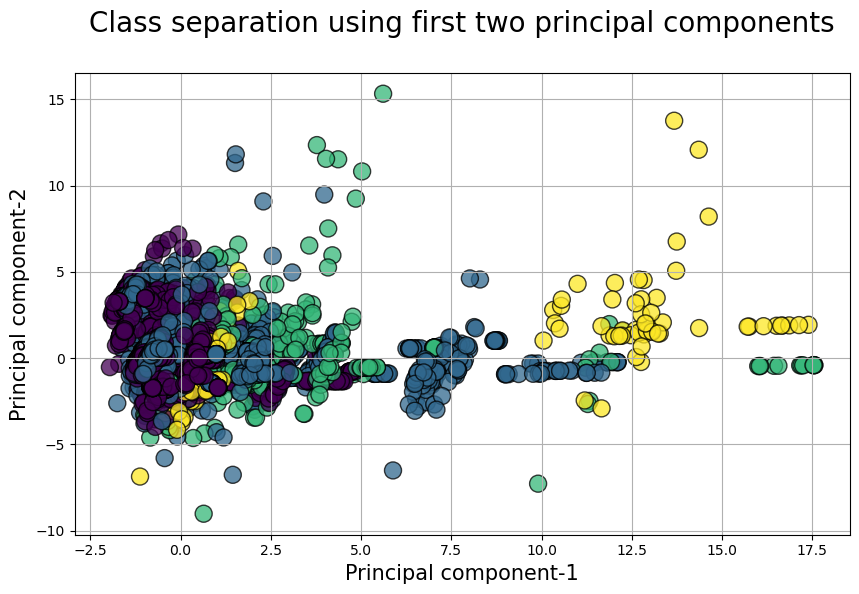

In [80]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=new_df['Scale'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()